In [133]:
#bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import random

#bibliotecas para clustering
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset


In [138]:
df = pd.DataFrame() #criação do DataFrame

for ii in range(0,80):
    if (ii >= 0) and (ii < 21): 
        p = np.poly1d([random.randint(1, 4)]) #criação de funções constantes
        x = [i for i in range(-30,30,1)]
        df[str(ii)] = p(x)
    if (ii >= 21) and (ii < 41):
        p = np.poly1d([random.randint(1, 4), random.randint(1, 4)]) #criação de funções de 1° grau
        x = [i for i in range(-30,30,1)]
        df[str(ii)] = p(x)
    if (ii >= 41) and (ii < 61):
        p = np.poly1d([random.randint(1, 4), random.randint(1, 4), random.randint(1, 4)]) #criação de funções de 2° grau
        x = [i for i in range(-30,30,1)]
        df[str(ii)] = p(x)
    if (ii >= 61) and (ii < 81):
        p = np.poly1d([random.randint(1, 4), random.randint(1, 4), random.randint(1, 4),random.randint(1, 4)]) #criação de funções de 3° grau
        x = [i for i in range(-30,30,1)]
        df[str(ii)] = p(x)

#neste momento as funções estão em sequência, então vamos embaralha-las

aux = df.transpose()
aux1 = aux.sample(frac=1) #função para misturar linhas aleatoriamente
df = aux1.transpose()

#como estamos interessados em agrupados por forma podemos normalizar os dados

norm = (df/df.max())

Para agrupar as funções por similaridade usaremos o método de KMeans adaptado para séries temporais da biblioteca tslearn. Além disso, a métrica usada será de "soft dtw" por ser mais sensível para esse tipo de amostra. Sabemos de antemão que existe 4 tipo de funções nos dados, portanto usaremos 4 clusters.

In [146]:
modelo = TimeSeriesKMeans(n_clusters=4, metric="softdtw", max_iter=50)

clusters = modelo.fit_predict(to_time_series_dataset(norm.transpose())) 
# "to_time_series_dataset" função para transformar os dados para base da biblioteca do tslearn

clusters_unico = np.unique(clusters) #array para auxiliar na separação por numero do cluster

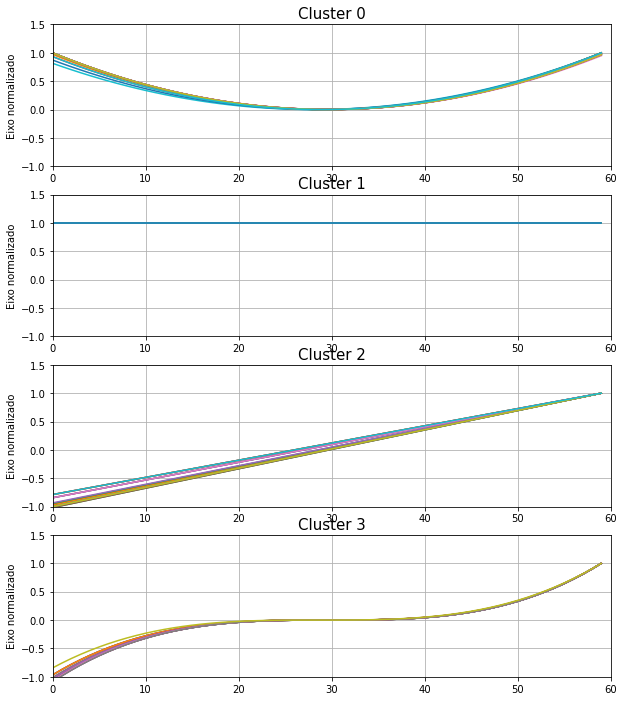

In [149]:
#Por fim separar os grupos dos clusters e plotar juntos

fig, ax = plt.subplots(len(clusters_unico),1,figsize=(10,12))

for i in range(0,len(norm.columns),1):
    for ii in range(len(clusters_unico)):
        if np.array_equal(np.array(clusters[i]).astype(int), clusters_unico[ii]) == True:
            ax[ii].plot(norm.iloc[:,i]) #plot da normalização dos dados para visualização
        ax[ii].set_title("Cluster " + str(clusters_unico[ii]), fontsize=15)
        ax[ii].set_ylabel("Eixo normalizado")
        ax[ii].grid(True)
        ax[ii].set_axisbelow(True)
        ax[ii].set_xlim(0,60)
        ax[ii].set_ylim(-1,1.5)


plt.show()

Caso o método não funcione totalmente, alterando o número de iterações podemos encontrar o valor ótimo para o agrupamento. 